In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [31]:
df = pd.read_csv('GOOGL.csv')

In [32]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [33]:
df.shape

(4431, 7)

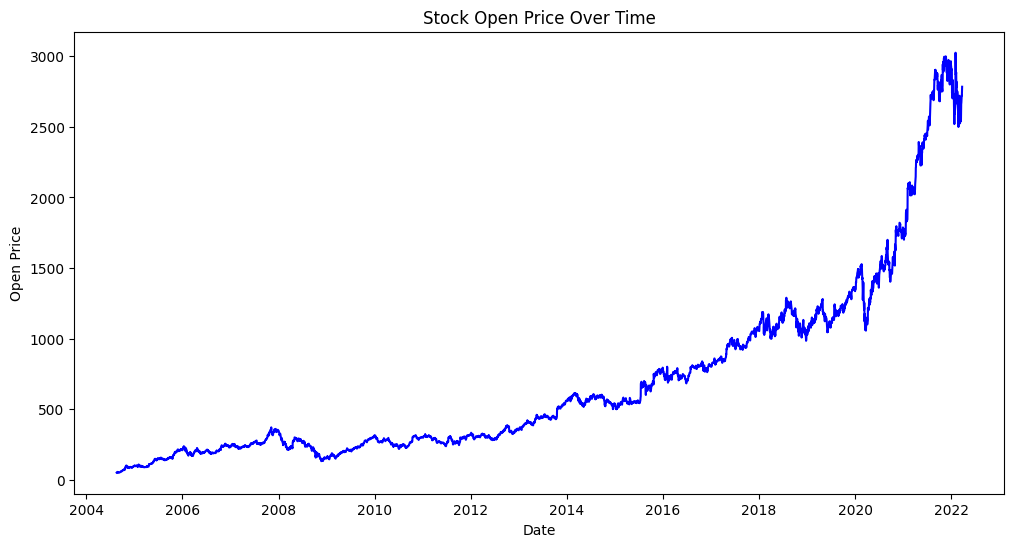

In [34]:
open_price = df['Open'].values
low_price = df['Low'].values
date = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(date, open_price, color='blue')
plt.title('Stock Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

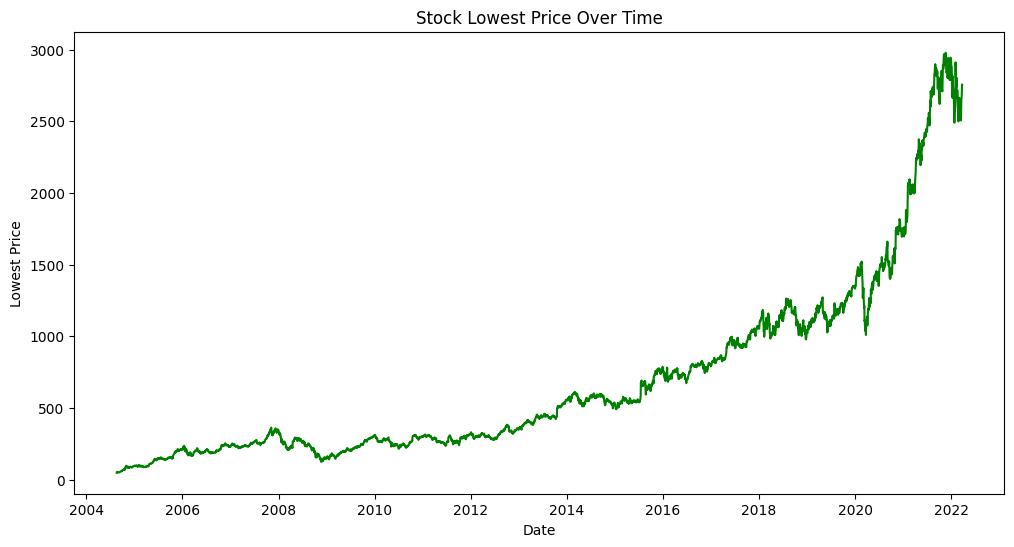

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(date, low_price, color='green')
plt.title('Stock Lowest Price Over Time')
plt.xlabel('Date')
plt.ylabel('Lowest Price')
plt.show()

In [36]:
df['Date'] = pd.to_datetime(df['Date'])

In [37]:
data = df['Open'].values.reshape(-1, 1)

In [38]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [39]:
window_size = 30
sequences = []
for i in range(len(scaled_data) - window_size):
    sequences.append(scaled_data[i:i+window_size+1])

sequences = np.array(sequences)

In [40]:
X = sequences[:, :-1]
y = sequences[:, -1]

In [41]:
split_ratio = 0.8
split_index = int(len(sequences) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [42]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [43]:
model = Sequential([
    SimpleRNN(64, input_shape=(window_size, 1), return_sequences=True),
    SimpleRNN(64),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
110/110 [==============================] - 3s 16ms/step - loss: 0.0061 - val_loss: 0.0348
Epoch 2/10
110/110 [==============================] - 1s 12ms/step - loss: 5.7296e-05 - val_loss: 0.0274
Epoch 3/10
110/110 [==============================] - 1s 13ms/step - loss: 4.2636e-05 - val_loss: 0.0233
Epoch 4/10
110/110 [==============================] - 1s 13ms/step - loss: 4.3335e-05 - val_loss: 0.0184
Epoch 5/10
110/110 [==============================] - 2s 18ms/step - loss: 3.9459e-05 - val_loss: 0.0168
Epoch 6/10
110/110 [==============================] - 2s 19ms/step - loss: 3.5295e-05 - val_loss: 0.0131
Epoch 7/10
110/110 [==============================] - 1s 13ms/step - loss: 3.2248e-05 - val_loss: 0.0120
Epoch 8/10
110/110 [==============================] - 1s 13ms/step - loss: 2.6207e-05 - val_loss: 0.0119
Epoch 9/10
110/110 [==============================] - 1s 14ms/step - loss: 2.3707e-05 - val_loss: 0.0095
Epoch 10/10
110/110 [==============================] - 1s 1

In [44]:
predictions = model.predict(X_test)

28/28 [==============================] - 0s 5ms/step


In [45]:
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [46]:
y_test_inv = y_test_inv.reshape(-1)

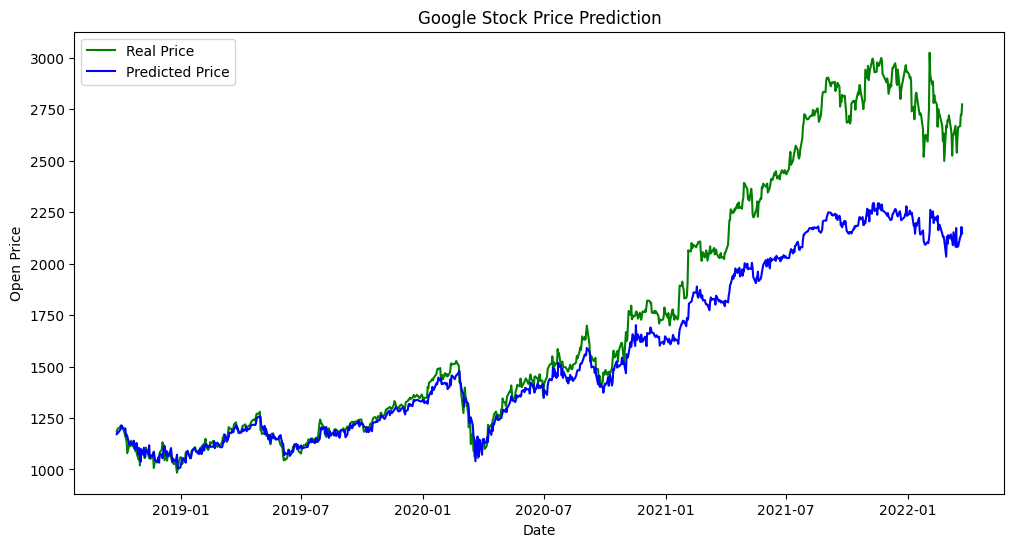

In [50]:
plt.figure(figsize=(12, 6))
date_values = df['Date'].values[split_index+window_size+1:split_index+window_size+len(predictions_inv)]
y_test_inv = y_test_inv[:len(date_values)]  # Slice y_test_inv to match date_values length
predictions_inv = predictions_inv[:len(date_values)]  # Slice predictions_inv to match date_values length
plt.plot(date_values, y_test_inv, color='green', label='Real Price')
plt.plot(date_values, predictions_inv, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

A Recurrent Neural Network (RNN) is a type of artificial neural network designed to process sequential data by maintaining internal memory. Unlike traditional feedforward neural networks, RNNs have connections that form directed cycles, allowing information to persist over time. This makes them particularly well-suited for tasks involving sequences, such as time series prediction, natural language processing, and speech recognition. RNNs process inputs one element at a time, updating their internal state with each new input. They can model temporal dependencies in data and are capable of handling inputs of variable lengths. However, standard RNNs may struggle with capturing long-range dependencies due to the vanishing gradient problem. Variants like Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) have been developed to address this limitation and improve the ability of RNNs to capture long-term dependencies.